In [3]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_earthq = pl.read_csv("../data/EarthquakesChile_2000-2024.csv").with_columns(year = pl.col("Date").str.slice(0,4).cast(pl.Int16))
df_anage = pl.read_csv("../data/anage.csv", ignore_errors=True)

Text(0, 0.5, 'Región')

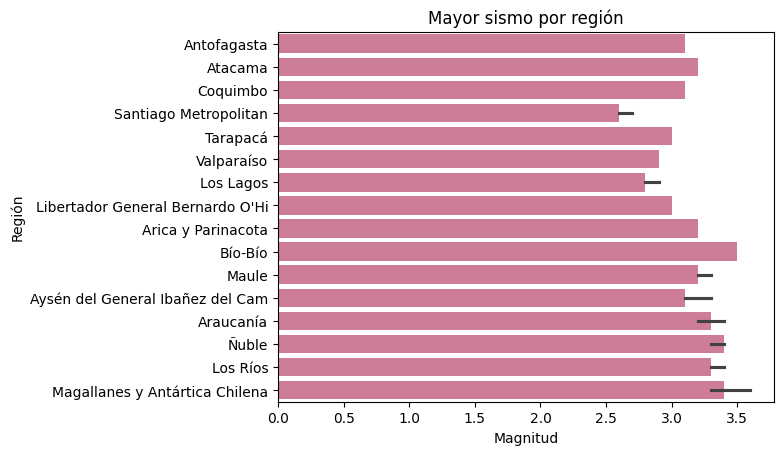

In [18]:
ax = sns.barplot(df_earthq, y="Region",x="Magnitude_Ml", estimator="median", color="palevioletred")

# plt.title("Sismo de mayor magnitud por región", fontsize=16, loc="left", fontweight="bold")
# plt.xlabel("Magnitud")
# plt.ylabel("Región")

ax.set_title("Mayor sismo por región")
ax.set_xlabel("Magnitud")
ax.set_ylabel("Región")

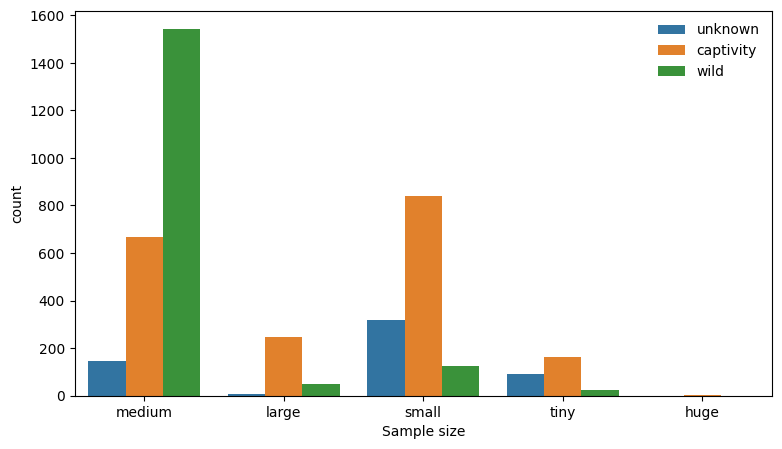

In [65]:
plt.figure(figsize=(9,5))
ax = sns.countplot(df_anage, x="Sample size", hue="Specimen origin")

# ax.legend(title="Origen del organismo", loc="upper right", bbox_to_anchor = (1.25,1))
# ax.legend(title="Origen del organismo", loc="best", title_fontsize=16)
ax.legend(title="Origen del organismo", loc="center", bbox_to_anchor = (0.5, -0.23) , ncol=3, fontsize=16, labelcolor = "red", 
          title_fontproperties = {"style":"italic", "weight":700, "family":"Roboto"})

ax.get_legend().get_title().set_color("cadetblue")

ax.legend(facecolor="#cfbaba", edgecolor="black", fancybox=False, shadow=True, )
ax.legend(facecolor="#cfbaba", frameon=False,fontsize=10)

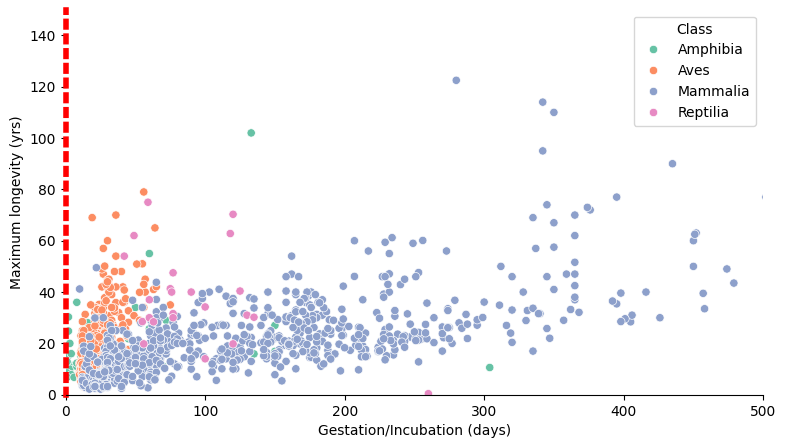

In [94]:
plt.figure(figsize=(9,5))
ax = sns.scatterplot(
    data=df_anage.filter(
        pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"]),
    ),
    x="Gestation/Incubation (days)",
    y="Maximum longevity (yrs)",
    hue="Class",
    palette="Set2"
)

ax.set_xlim(0,500)
ax.set_ylim(0,150)

ax.spines["left"].set_color("red")
# ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_linestyle(":")
ax.spines["left"].set_linewidth(4)

ax.spines["bottom"].set_visible(False)
sns.despine()



([<matplotlib.axis.YTick at 0x7bce84ac0e10>,
 [Text(0, 0, '0'), Text(0, 100, '100'), Text(0, 200, '200')])

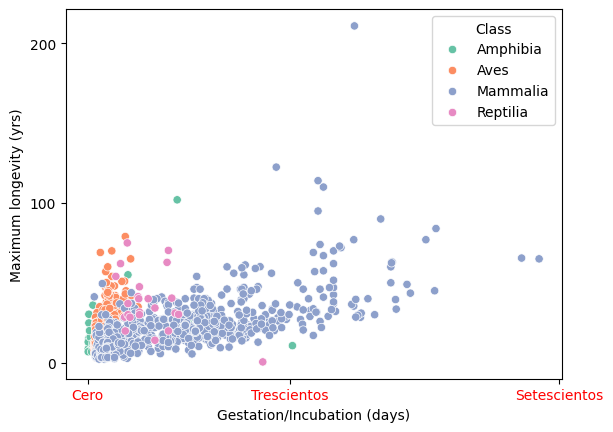

In [114]:
ax = sns.scatterplot(
    data=df_anage.filter(
        pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"]),
    ),
    x="Gestation/Incubation (days)",
    y="Maximum longevity (yrs)",
    hue="Class",
    palette="Set2"
)
# plt.xticks(rotation=90, ha="center")
plt.xticks([0,300,700])
# plt.xticks([-100,0,300,700])
plt.xticks([0,300,700], ["Cero","Trescientos","Setescientos"], color="red")

plt.yticks([0,100,200])

In [115]:
def scatterplot_anage(df):
    plt.figure(figsize=(10,6))
    ax = sns.scatterplot(
        data=df.filter(
            pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"]),
        ),
        x="Gestation/Incubation (days)",
        y="Maximum longevity (yrs)",
        hue="Class",
        palette="Set2",
    )

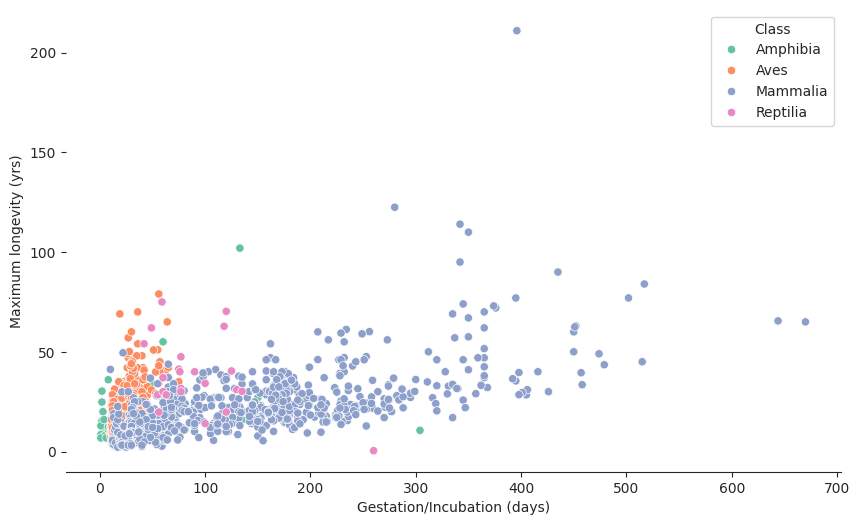

In [122]:
sns.set_style("ticks")
scatterplot_anage(df_anage)
sns.despine()
sns.despine(left=True)

In [126]:
ticks_style = sns.axes_style("ticks")
ticks_style

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': True,
 'ytick.left': True}

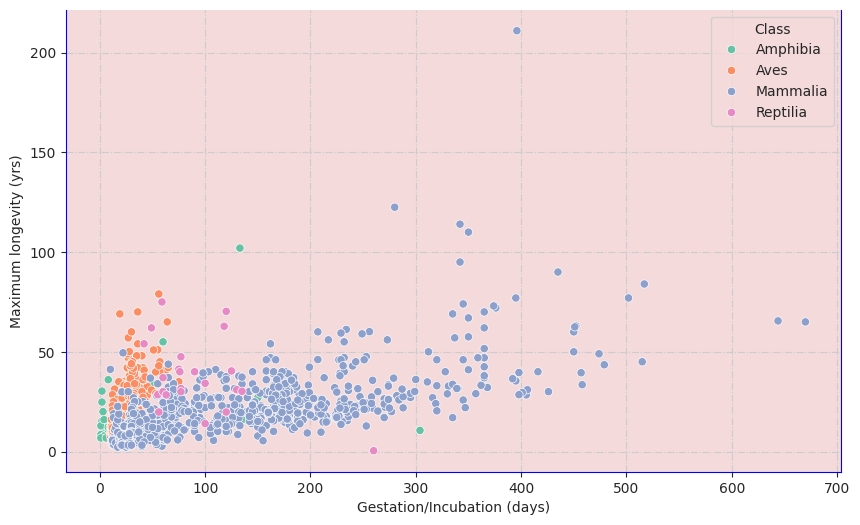

In [139]:
ticks_style.update({
  "axes.edgecolor":"blue",
  "axes.spines.top":False,
  "axes.facecolor":"#f4dada",
  "axes.grid": True,
  "grid.linestyle":"-.",
})
sns.set_style(ticks_style)
scatterplot_anage(df_anage)

<Figure size 900x600 with 0 Axes>

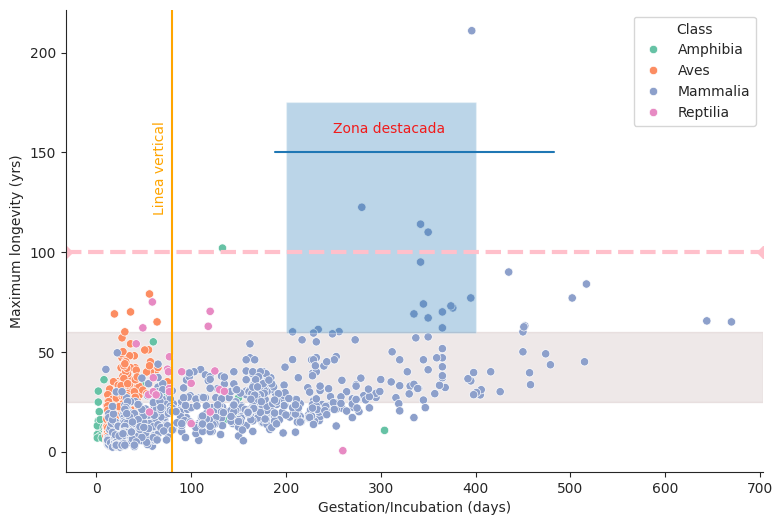

In [194]:
plt.figure(figsize=(9,6))
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(9,6))
ax.axhspan(25,60, color="#C8B3B3", alpha=0.3, in_layout=False)

sns.scatterplot(
    data=df_anage.filter(
        pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"]),
    ),
    x="Gestation/Incubation (days)",
    y="Maximum longevity (yrs)",
    hue="Class",
    palette="Set2",
    ax=ax
)

ax.axhline(100, color="pink", linestyle="--", linewidth=3, marker="D")
ax.axvline(80, color="orange")

ax.axhline(150, xmin=0.3, xmax=0.7)


ax.axvspan(200,400, alpha=0.3, ymin=0.3, ymax=0.8)
ax.text(250,160, "Zona destacada", color="#F11B1B", rotation=0)
ax.text(60, 120, "Linea vertical", rotation=90, color="orange")
sns.despine()

Text(406, 209.0, 'Bowhead whale')

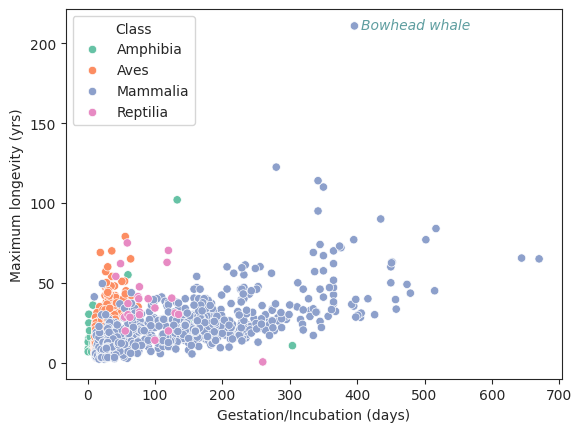

In [210]:
ax = sns.scatterplot(
        data=df_anage.filter(
            pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"]),
        ),
        x="Gestation/Incubation (days)",
        y="Maximum longevity (yrs)",
        hue="Class",
        palette="Set2",
    )
df_filter = df_anage.filter(
            pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"]),
        )
max_long = df_filter.sort("Maximum longevity (yrs)", descending=True, nulls_last=True).head(1)

pos_long = max_long["Maximum longevity (yrs)"][0]
pos_gest = max_long["Gestation/Incubation (days)"][0]
name = max_long["Common name"][0]

ax.annotate(text=name, xy =(pos_gest + 10,pos_long-2), fontsize=10, color="cadetblue", fontstyle="italic")

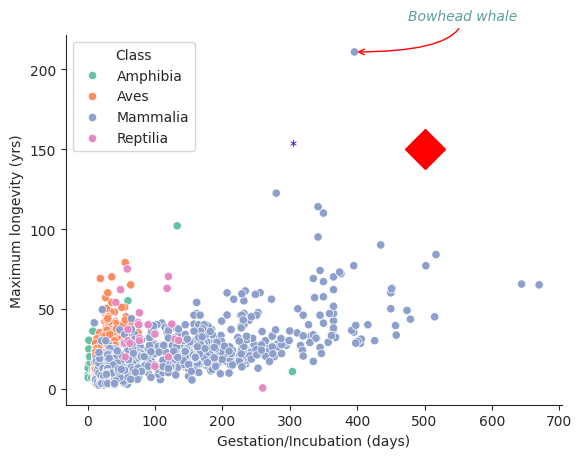

In [235]:
ax = sns.scatterplot(
        data=df_anage.filter(
            pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"]),
        ),
        x="Gestation/Incubation (days)",
        y="Maximum longevity (yrs)",
        hue="Class",
        palette="Set2",
    )
df_filter = df_anage.filter(
            pl.col("Class").is_in(["Mammalia", "Aves", "Amphibia", "Reptilia"]),
        )
max_long = df_filter.sort("Maximum longevity (yrs)", descending=True, nulls_last=True).head(1)

pos_long = max_long["Maximum longevity (yrs)"][0]
pos_gest = max_long["Gestation/Incubation (days)"][0]
name = max_long["Common name"][0]

# ax.annotate(text=name, 
#             xy = (pos_gest,pos_long),
#             xytext =(pos_gest + 80,pos_long+20), 
#             fontsize=10, color="cadetblue", fontstyle="italic",
#             arrowprops = dict(
#                 arrowstyle="->",
#                 color="red",
#                 connectionstyle="arc3, rad=-0.3"
                
#             )
            
#             )

ax.annotate(text=name, 
            xy = (pos_gest,pos_long),
            xytext =(pos_gest + 80,pos_long+20), 
            fontsize=10, color="cadetblue", fontstyle="italic",
            arrowprops = dict(
                arrowstyle="->",
                color="red",
                connectionstyle="angle3"
                
            )
            
            )

ax.annotate("*",xy=(300,150), color="blue")
ax.plot(500,150, color="red", marker="D", markersize=20)
sns.despine()